 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [2]:
# Assigning directory for whale returns csv file

In [3]:
whales_files = Path('./Resources/whale_returns.csv')

In [4]:
# Reading whale returns
whales_df = pd.read_csv(whales_files)
whales_df = whales_df.set_index(pd.to_datetime(whales_df['Date'], infer_datetime_format=True))
whales_df.drop(columns='Date', inplace=True)
# whales_df = pd.read_csv(whales_files, index_col='Date')
whales_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [5]:
# Count nulls
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [6]:
# Drop nulls
whales_df.dropna(inplace= True)
whales_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [7]:
# Reading algorithmic returns
algo_files = Path('./Resources/algo_returns.csv')
algo_df = pd.read_csv(algo_files)
algo_df = algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True))
algo_df.drop(columns='Date', inplace=True)
# algo_df = pd.read_csv(algo_files, index_col='Date')
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_df.dropna(inplace= True)
algo_df.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [10]:
# Reading S&P TSX 60 Closing Prices
snp60_files = Path('./Resources/sp_tsx_history.csv')
# snp60_df = pd.read_csv(snp60_files, index_col='Date')
# snp60_df = pd.read_csv(snp60_files)
snp60_df = pd.read_csv(snp60_files, infer_datetime_format=True)
snp60_df =snp60_df.set_index(pd.to_datetime(snp60_df['Date'], infer_datetime_format=True))
snp60_df.drop(columns='Date', inplace=True)
snp60_df

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [11]:
# Check Data Types
snp60_df.dtypes

Close    object
dtype: object

In [12]:
# Fix Data Types
snp60_df['Close'] = snp60_df['Close'].str.replace('$','').str.replace(',','')
snp60_df.dtypes
snp60_df['Close'] = snp60_df['Close'].astype('float')
snp60_df.dtypes
snp60_df

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_3980\4078100854.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  snp60_df['Close'] = snp60_df['Close'].str.replace('$','').str.replace(',','')


,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [13]:
# Calculate Daily Returns
snp60_daily_returns = snp60_df.pct_change()
snp60_daily_returns

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


In [14]:
# Drop nulls
snp60_daily_returns.dropna(inplace= True)
snp60_daily_returns.isnull().sum()

Close    0
dtype: int64

In [15]:
# Rename `Close` Column to be specific to this portfolio.
snp60_daily_returns.columns=['S&P TSX 60 Returns']
snp60_daily_returns

,S&P TSX 60 Returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat(
    [whales_df,algo_df,snp60_daily_returns],
    axis = 1,
    join = 'inner'
)
combined_df
# snp60_daily_returns.loc['2015-03-03']

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<Axes: title={'center': 'Daily Returns of Portfolio'}, xlabel='Date'>

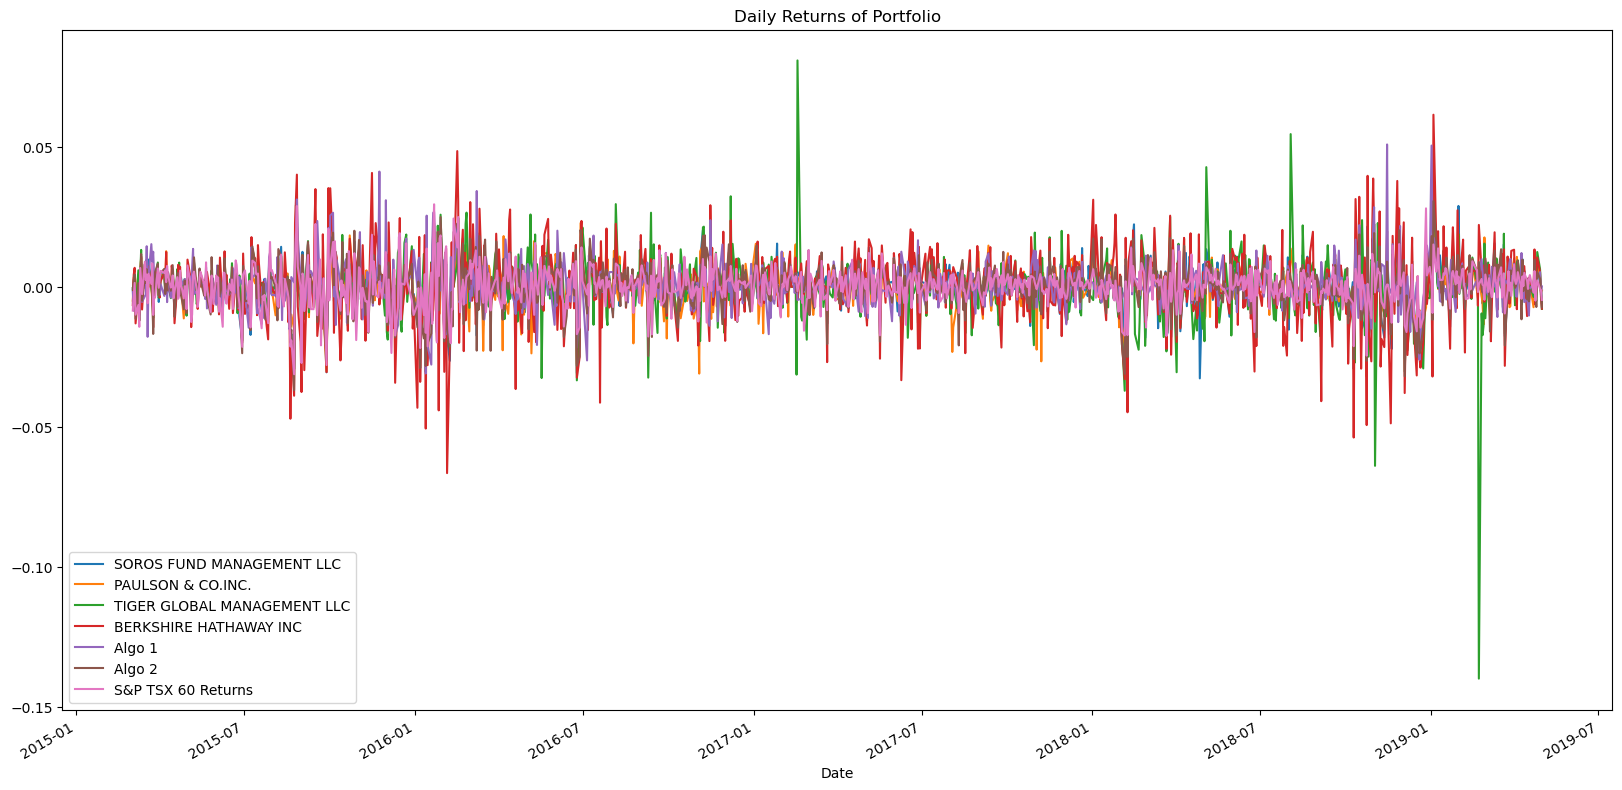

In [17]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10), title='Daily Returns of Portfolio')

#### Calculate and Plot cumulative returns.

<Axes: title={'center': 'Cumulative Returns of Portfolio'}, xlabel='Date'>

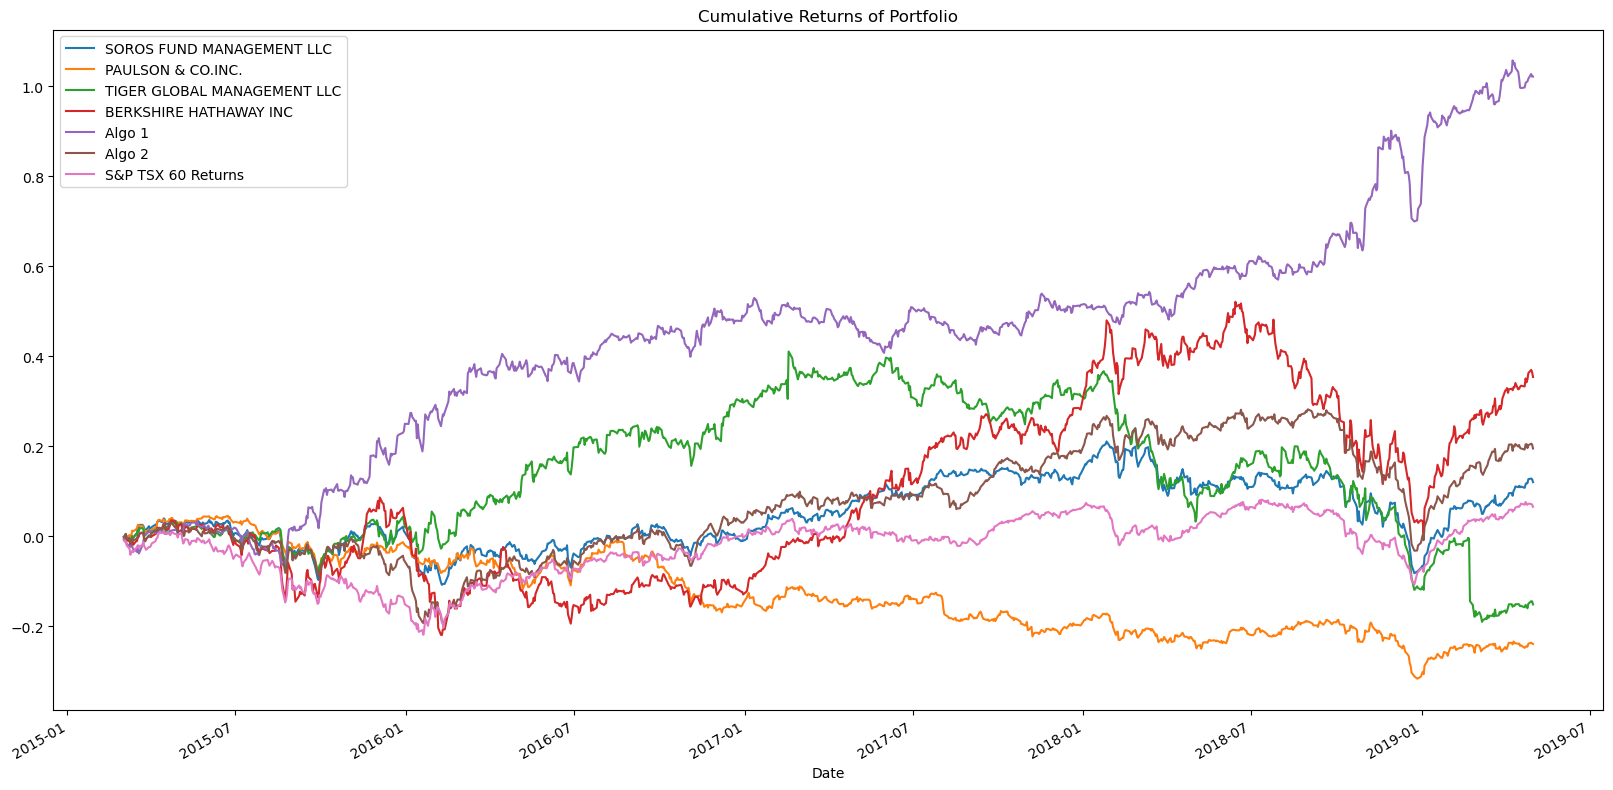

In [18]:
# Calculate cumulative returns of all portfolios
cummulative_returns = (1+combined_df).cumprod()-1
# Plot cumulative returns
cummulative_returns.plot(figsize=(20,10), title="Cumulative Returns of Portfolio")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<Axes: >

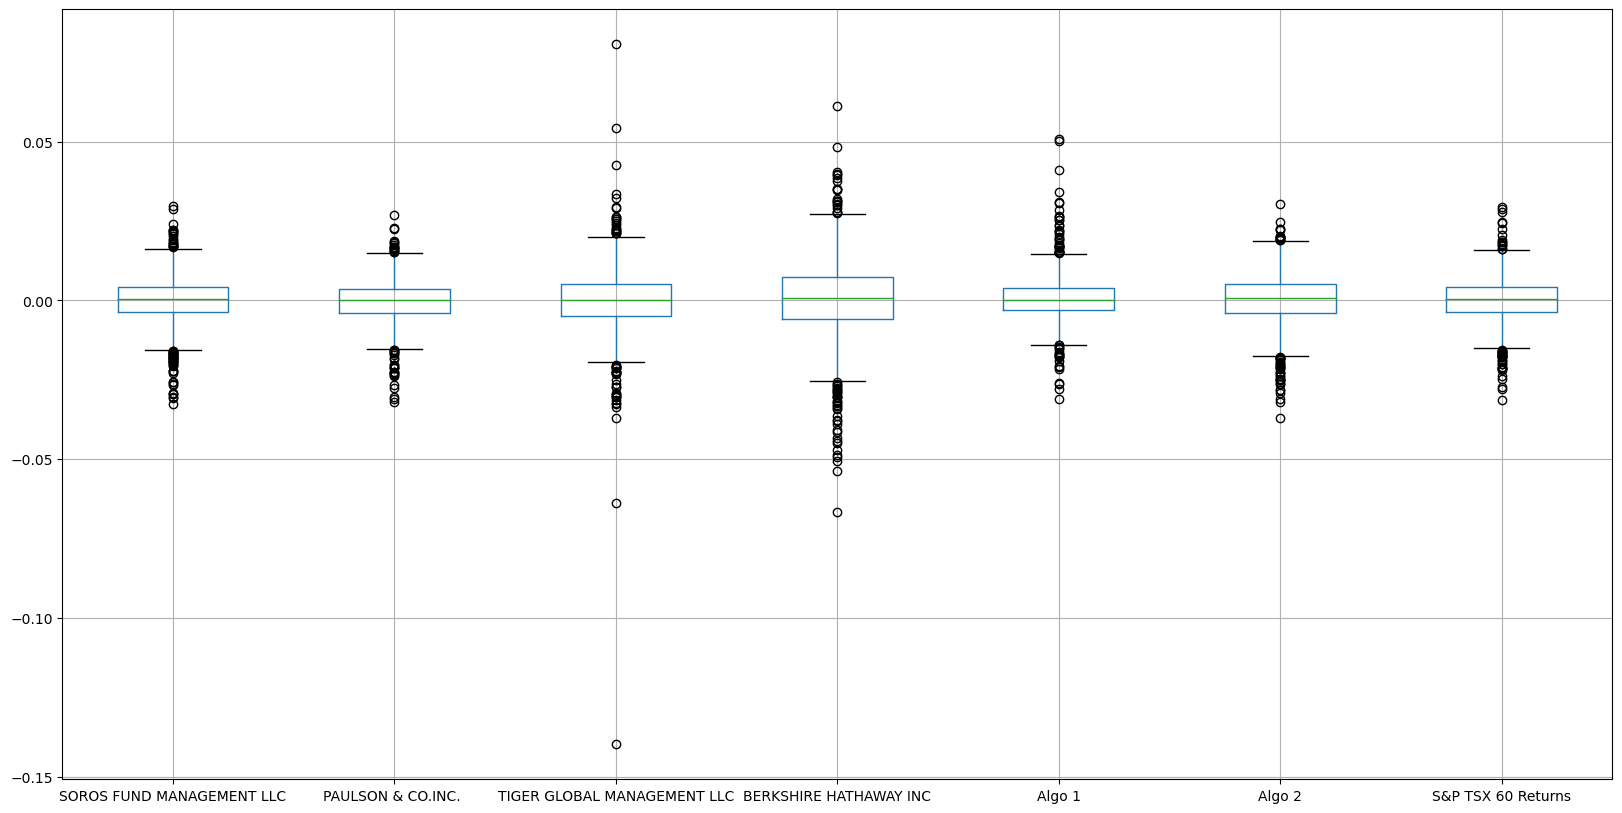

In [19]:
# Box plot to visually show risk
pd.plotting.boxplot(combined_df, figsize=(20,10))

### Calculate Standard Deviations

In [20]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined_df.std()
combined_std

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
S&P TSX 60 Returns             0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [21]:
# Calculate  the daily standard deviation of S&P TSX 60
snp60_std = combined_df['S&P TSX 60 Returns'].std()
snp60_std
# Determine which portfolios are riskier than the S&P TSX 60
print('The following portfolios are riskier than the S&P TSX 60:')
for i in range(7):
    if combined_std[i] > snp60_std:
        print(combined_std[[i]])

The following portfolios are riskier than the S&P TSX 60:
SOROS FUND MANAGEMENT LLC    0.007828
dtype: float64
TIGER GLOBAL MANAGEMENT LLC    0.010883
dtype: float64
BERKSHIRE HATHAWAY INC    0.012826
dtype: float64
Algo 1    0.007589
dtype: float64
Algo 2    0.008326
dtype: float64


### Calculate the Annualized Standard Deviation

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = combined_std * np.sqrt(252)
annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
S&P TSX 60 Returns             0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

<Axes: title={'center': '21-day Rolling Standard Deviation of Returns of Portfolio'}, xlabel='Date'>

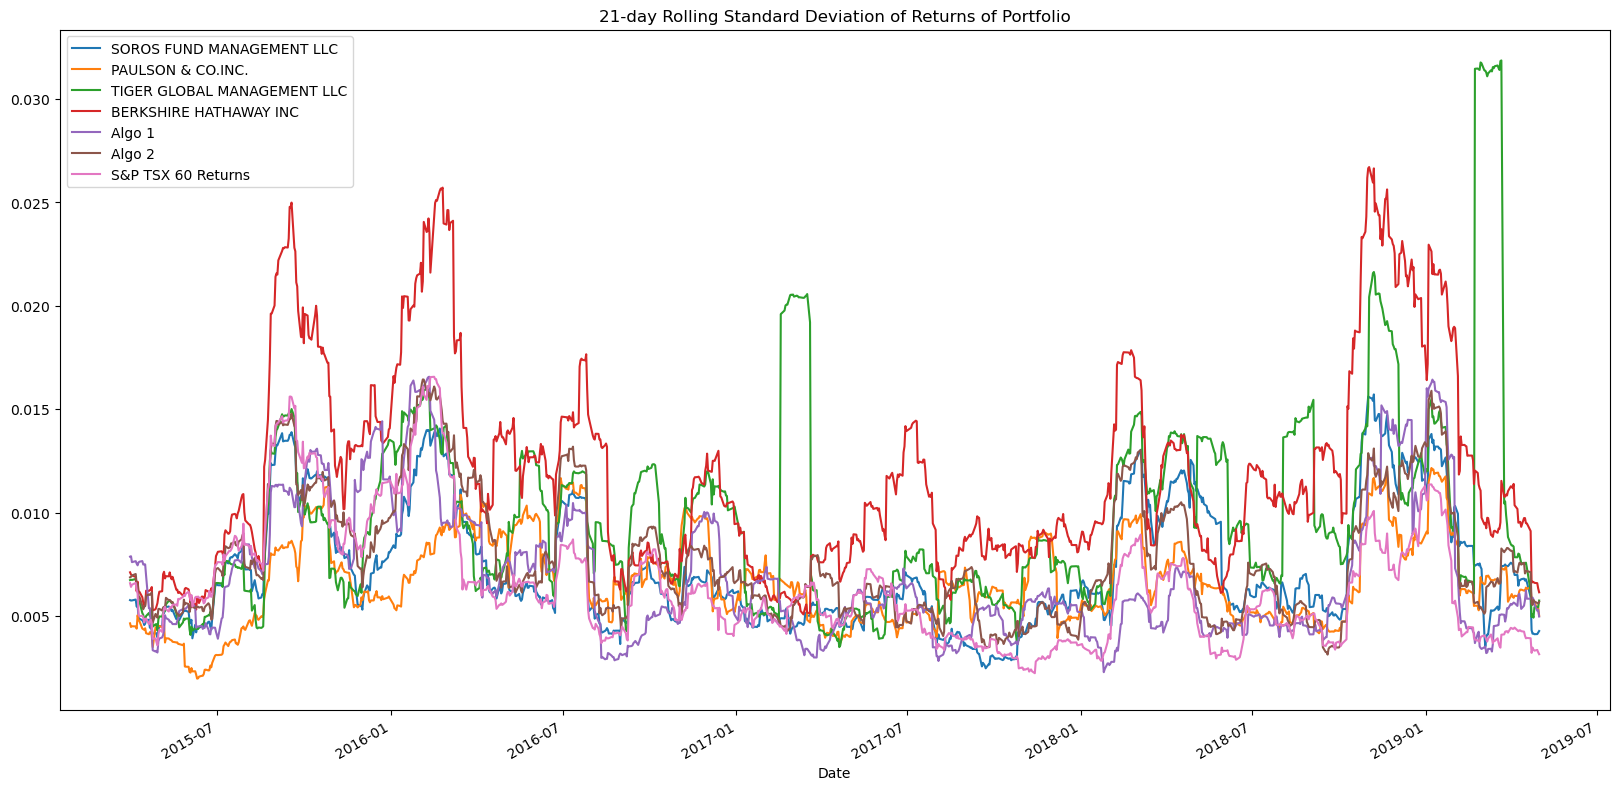

In [23]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_std.plot(figsize=(20,10), title="21-day Rolling Standard Deviation of Returns of Portfolio")

### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combined_df.corr() #correlation of the returns ?
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
S&P TSX 60 Returns,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

<Axes: title={'center': 'Algo 2 60-Day Rolling Beta Against S&P TSX 60'}, xlabel='Date'>

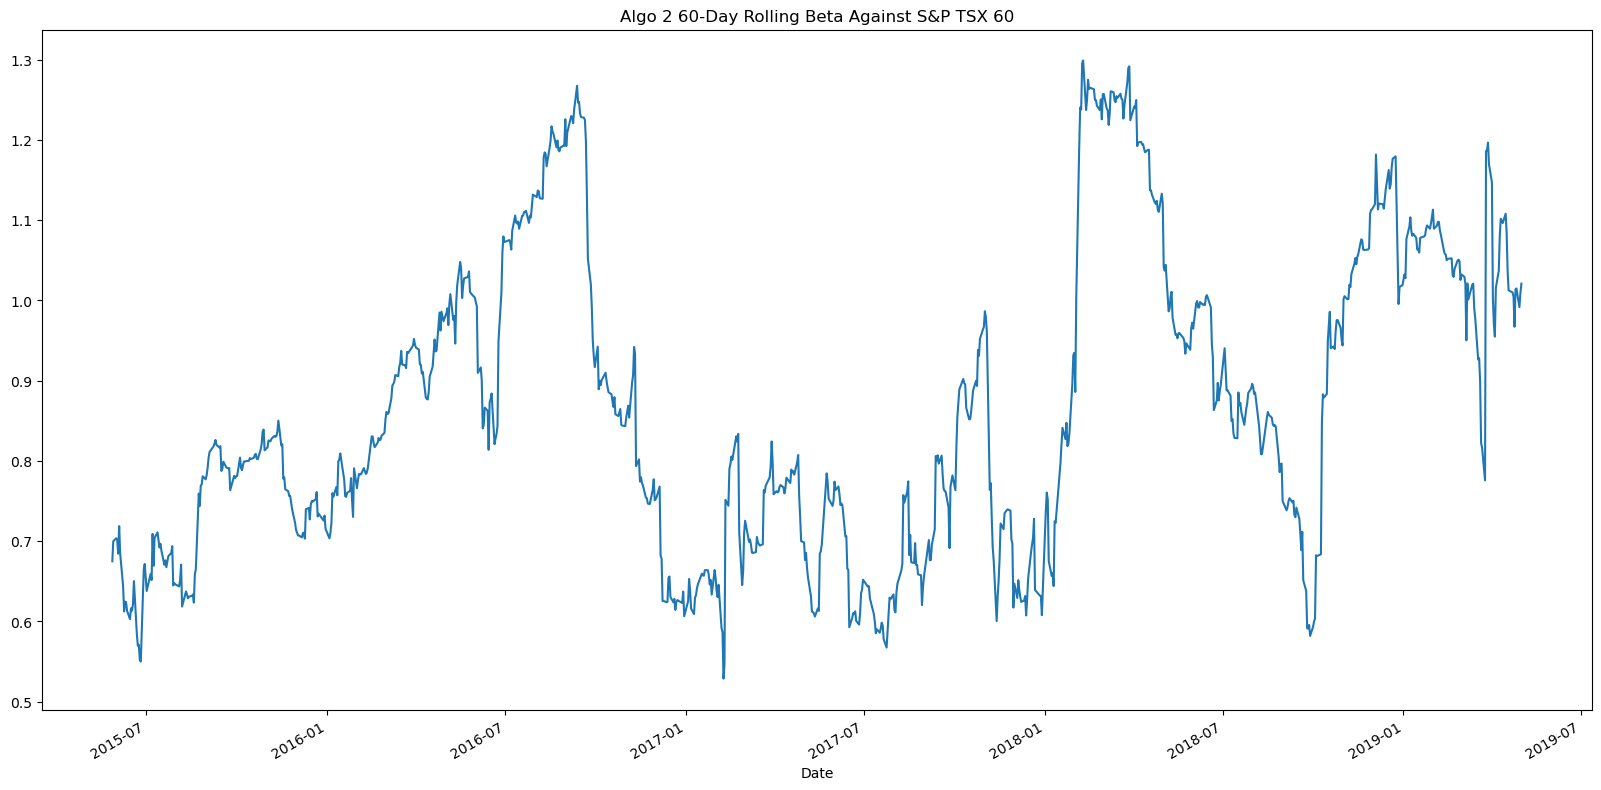

In [26]:
# Calculate covariance of a single portfolio
algo2_covariance = combined_df['Algo 2'].cov(combined_df['S&P TSX 60 Returns'])
algo2_covariance
# Calculate variance of S&P TSX
snp60_variance = combined_df['S&P TSX 60 Returns'].var()
snp60_variance
# Computing beta
algo2_beta = algo2_covariance / snp60_variance
algo2_beta
# Plot beta trend
snp60_rolling_variance = combined_df['S&P TSX 60 Returns'].rolling(window=60).var()
algo2_rolling_covariance = combined_df['Algo 2'].rolling(window=60).cov(combined_df['S&P TSX 60 Returns'])
algo2_rolling_beta = algo2_rolling_covariance / snp60_rolling_variance
algo2_rolling_beta.plot(figsize = (20,10), title = 'Algo 2 60-Day Rolling Beta Against S&P TSX 60')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [27]:
# Use `ewm` to calculate the rolling window
ewm = combined_df.ewm(halflife=21).std()
ewm

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.004936
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.005205
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.004517
...,...,...,...,...,...,...,...
2019-04-25,0.006819,0.006342,0.014811,0.010830,0.006526,0.007500,0.004700
2019-04-26,0.006819,0.006448,0.014764,0.010763,0.006433,0.007418,0.004628
2019-04-29,0.006708,0.006357,0.014575,0.010601,0.006378,0.007304,0.004564


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
# Annualized Sharpe Ratios
sharpe_ratio = (combined_df.mean() * 252)/ annualized_std

<Axes: title={'center': 'Sharpe Ratio of Portfolios'}>

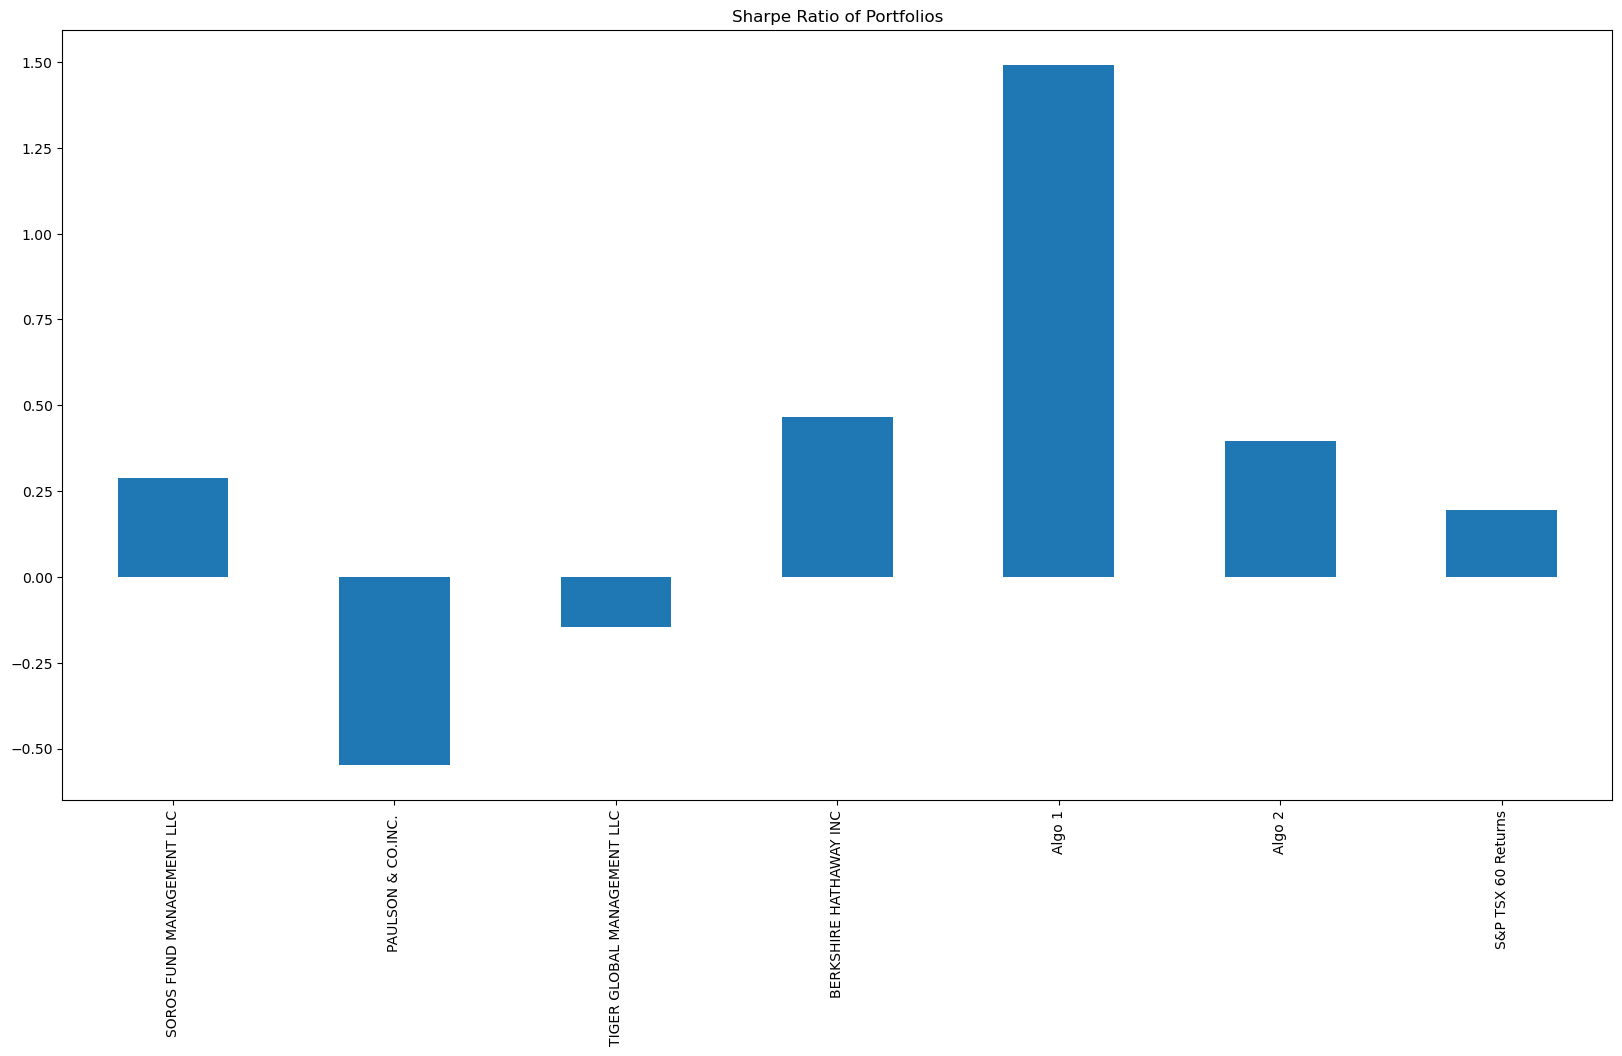

In [29]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(figsize = (20,10), title = 'Sharpe Ratio of Portfolios')

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

Algo 1 had the highest sharpe ratio of all portfolios and therfore considered the most rewarding considering the risk involved.
Berkshire Hathway has the highest standard deviation and therefore considered fairly risky.
Correlation with the S&P TSX 60 was closest to Algo 2 achieving a betta of 0.873, and Berkshire Hathway closer than Algo 1.
The cummulative returns were highest for Algo 1, Berkshire Hathway followed and Algo 2 come after it.
Conclusion: Algo 1 yielded the highest rewards and had considerable risk but std was not too  high.
Algo 2 is considered less risky than Berkshire Hathway but had a smaller sharpe ratio and smaller cummulative returns than Berkshire Hathway.
All other portfolio performed less rewardingly than the top 3 mentioned above.---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [30]:
# Reading data from 1st stock
TEAM_files = Path('./Resources/TEAM.csv')
TEAM_df = pd.read_csv(TEAM_files)
TEAM_df['Date'] = TEAM_df['Date'].str.replace('16:00:00','')
TEAM_df

,Date,Close
0,12/10/2015,27.78
1,12/11/2015,27.50
2,12/14/2015,26.26
3,12/15/2015,26.50
4,12/16/2015,26.54
...,...,...
846,4/24/2019,103.17
847,4/25/2019,106.00
848,4/26/2019,108.21
849,4/29/2019,110.05


In [31]:
TEAM_df = TEAM_df.set_index(pd.to_datetime(TEAM_df['Date'], infer_datetime_format=True))
TEAM_df.drop(columns='Date', inplace=True)
# TEAM_df = TEAM_df.index.date
TEAM_df

,Close
Date,
2015-12-10,27.78
2015-12-11,27.50
2015-12-14,26.26
2015-12-15,26.50
2015-12-16,26.54
...,...
2019-04-24,103.17
2019-04-25,106.00
2019-04-26,108.21


In [32]:
# Reading data from 2nd stock
AMZN_files = Path('./Resources/AMZN.csv')
AMZN_df = pd.read_csv(AMZN_files)
AMZN_df['Date'] = AMZN_df['Date'].str.replace('16:00:00','')
AMZN_df

,Date,Close
0,3/3/2015,19.23
1,3/4/2015,19.14
2,3/5/2015,19.39
3,3/6/2015,19.00
4,3/9/2015,18.93
...,...,...
1043,4/24/2019,95.09
1044,4/25/2019,95.11
1045,4/26/2019,97.53
1046,4/29/2019,96.92


In [33]:
AMZN_df = AMZN_df.set_index(pd.to_datetime(AMZN_df['Date'], infer_datetime_format=True))
AMZN_df.drop(columns='Date', inplace=True)
AMZN_df

,Close
Date,
2015-03-03,19.23
2015-03-04,19.14
2015-03-05,19.39
2015-03-06,19.00
2015-03-09,18.93
...,...
2019-04-24,95.09
2019-04-25,95.11
2019-04-26,97.53


In [34]:
# Reading data from 3rd stock
AAPL_files = Path('./Resources/AAPL.csv')
AAPL_df = pd.read_csv(AAPL_files)
AAPL_df['Date'] = AAPL_df['Date'].str.replace('16:00:00','')
AAPL_df

,Date,Close
0,3/3/2015,32.34
1,3/4/2015,32.14
2,3/5/2015,31.60
3,3/6/2015,31.65
4,3/9/2015,31.79
...,...,...
1043,4/24/2019,51.79
1044,4/25/2019,51.32
1045,4/26/2019,51.08
1046,4/29/2019,51.15


In [35]:
AAPL_df = AAPL_df.set_index(pd.to_datetime(AAPL_df['Date'], infer_datetime_format=True))
AAPL_df.drop(columns='Date', inplace=True)
AAPL_df

,Close
Date,
2015-03-03,32.34
2015-03-04,32.14
2015-03-05,31.60
2015-03-06,31.65
2015-03-09,31.79
...,...
2019-04-24,51.79
2019-04-25,51.32
2019-04-26,51.08


In [36]:
# Combine all stocks in a single DataFrame
my_portfolio_df = pd.concat (
    [TEAM_df, AMZN_df, AAPL_df],
    axis = 1,
    join = 'inner'
)
my_portfolio_df

,Close,Close,Close
Date,,,
2015-12-10,27.78,33.12,29.04
2015-12-11,27.50,32.01,28.30
2015-12-14,26.26,32.90,28.12
2015-12-15,26.50,32.93,27.62
2015-12-16,26.54,33.79,27.84
...,...,...,...
2019-04-24,103.17,95.09,51.79
2019-04-25,106.00,95.11,51.32
2019-04-26,108.21,97.53,51.08


In [37]:
# # Reset Date index
# my_portfolio_df.index = my_portfolio_df.index.date
# my_portfolio_df

In [38]:
# Reorganize portfolio data by having a column per symbol
my_portfolio_df.columns = ['TEAM', 'AMZN', 'AAPL']
my_portfolio_df

,TEAM,AMZN,AAPL
Date,,,
2015-12-10,27.78,33.12,29.04
2015-12-11,27.50,32.01,28.30
2015-12-14,26.26,32.90,28.12
2015-12-15,26.50,32.93,27.62
2015-12-16,26.54,33.79,27.84
...,...,...,...
2019-04-24,103.17,95.09,51.79
2019-04-25,106.00,95.11,51.32
2019-04-26,108.21,97.53,51.08


In [39]:
# Calculate daily returns
my_portfolio_returns = my_portfolio_df.pct_change()
# Drop NAs
my_portfolio_returns.dropna(inplace=True)
# Display sample data
my_portfolio_returns

,TEAM,AMZN,AAPL
Date,,,
2015-12-11,-0.010079,-0.033514,-0.025482
2015-12-14,-0.045091,0.027804,-0.006360
2015-12-15,0.009139,0.000912,-0.017781
2015-12-16,0.001509,0.026116,0.007965
2015-12-17,0.055388,-0.007695,-0.021193
...,...,...,...
2019-04-24,-0.033265,-0.011436,-0.001542
2019-04-25,0.027430,0.000210,-0.009075
2019-04-26,0.020849,0.025444,-0.004677


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [40]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
my_portfolio_weighted_returns = my_portfolio_returns.dot(weights)
# Display sample data

my_portfolio_weighted_returns = pd.DataFrame(my_portfolio_weighted_returns)
my_portfolio_weighted_returns.columns = ['My Portfolio']
my_portfolio_weighted_returns

,My Portfolio
Date,
2015-12-11,-0.023025
2015-12-14,-0.007883
2015-12-15,-0.002577
2015-12-16,0.011864
2015-12-17,0.008834
...,...
2019-04-24,-0.015414
2019-04-25,0.006189
2019-04-26,0.013872


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [41]:
# Join your returns DataFrame to the original returns DataFrame
all_portfolios_df = pd.concat(
    [combined_df,my_portfolio_weighted_returns],
    axis = 1,
    join = 'inner'
)
all_portfolios_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns,My Portfolio
Date,,,,,,,,
2015-12-11,-0.015554,-0.008345,-0.017981,-0.034280,-0.017537,-0.018084,-0.017412,-0.023025
2015-12-14,-0.004105,-0.000152,0.012146,0.004763,-0.013886,-0.008425,-0.007385,-0.007883
2015-12-15,0.011164,0.007587,0.013457,0.009112,0.009156,0.010389,0.017650,-0.002577
2015-12-16,0.010686,0.005379,0.013327,0.024484,0.012167,0.016363,0.019080,0.011864
2015-12-17,-0.008056,-0.005604,-0.013552,-0.005377,-0.003420,-0.007813,-0.011860,0.008834
...,...,...,...,...,...,...,...,...
2019-04-24,0.002284,0.001009,-0.004000,-0.006386,0.001095,0.000399,-0.004972,-0.015414
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628,0.006189
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254,0.013872


In [42]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
all_portfolios_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
Algo 1                         0
Algo 2                         0
S&P TSX 60 Returns             0
My Portfolio                   0
dtype: int64

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [43]:
all_portfolios_annualized_std = all_portfolios_df.std() * np.sqrt(252)
all_portfolios_annualized_std

SOROS FUND MANAGEMENT LLC      0.123615
PAULSON & CO.INC.              0.114254
TIGER GLOBAL MANAGEMENT LLC    0.181593
BERKSHIRE HATHAWAY INC         0.204275
Algo 1                         0.115792
Algo 2                         0.131030
S&P TSX 60 Returns             0.102828
My Portfolio                   0.248919
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<Axes: title={'center': '21-day Rolling Standard Deviation of Returns of All Portfolios'}, xlabel='Date'>

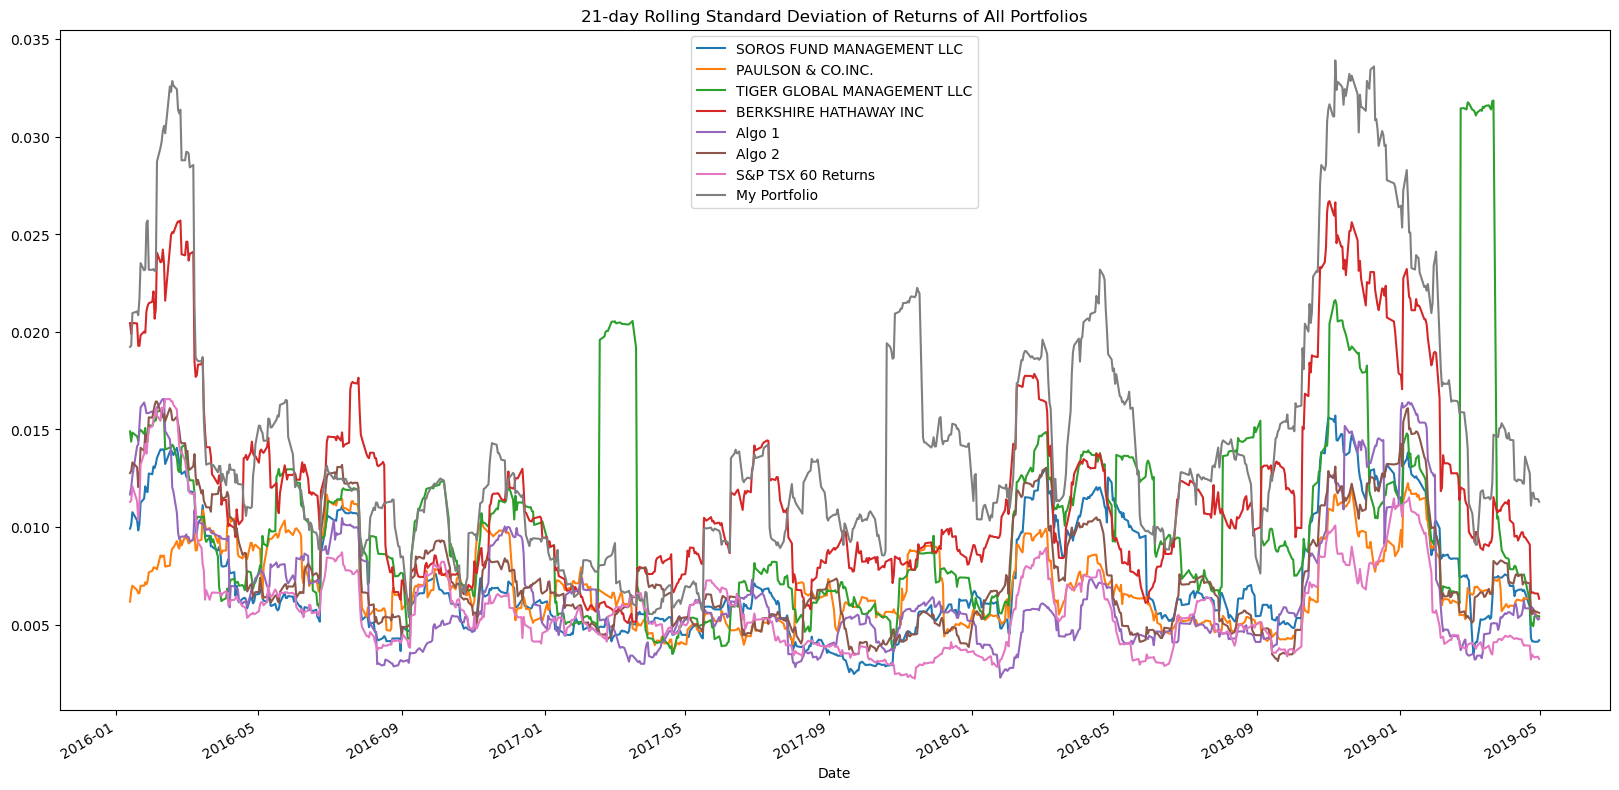

In [44]:
# Calculate rolling standard deviation
all_portfolios_rolling_std = all_portfolios_df.rolling(window=21).std()
# Plot the rolling standard deviation
all_portfolios_rolling_std.plot(figsize=(20,10), title="21-day Rolling Standard Deviation of Returns of All Portfolios")

### Calculate and plot the correlation

In [45]:
# Calculate and plot the correlation
all_portfolios_correlation = all_portfolios_df.corr()
all_portfolios_correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX 60 Returns,My Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.677302,0.514461,0.745351,0.285028,0.816820,0.646374,0.625200
PAULSON & CO.INC.,0.677302,1.000000,0.391862,0.516110,0.249085,0.670778,0.474066,0.446969
TIGER GLOBAL MANAGEMENT LLC,0.514461,0.391862,1.000000,0.379356,0.138336,0.455629,0.391184,0.336806
BERKSHIRE HATHAWAY INC,0.745351,0.516110,0.379356,1.000000,0.274415,0.681421,0.533479,0.708241
Algo 1,0.285028,0.249085,0.138336,0.274415,1.000000,0.277666,0.282029,0.234379
Algo 2,0.816820,0.670778,0.455629,0.681421,0.277666,1.000000,0.732186,0.596737
S&P TSX 60 Returns,0.646374,0.474066,0.391184,0.533479,0.282029,0.732186,1.000000,0.454528
My Portfolio,0.625200,0.446969,0.336806,0.708241,0.234379,0.596737,0.454528,1.000000


### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

<Axes: title={'center': 'My Portfolio 60-Day Rolling Beta Against S&P TSX 60'}, xlabel='Date'>

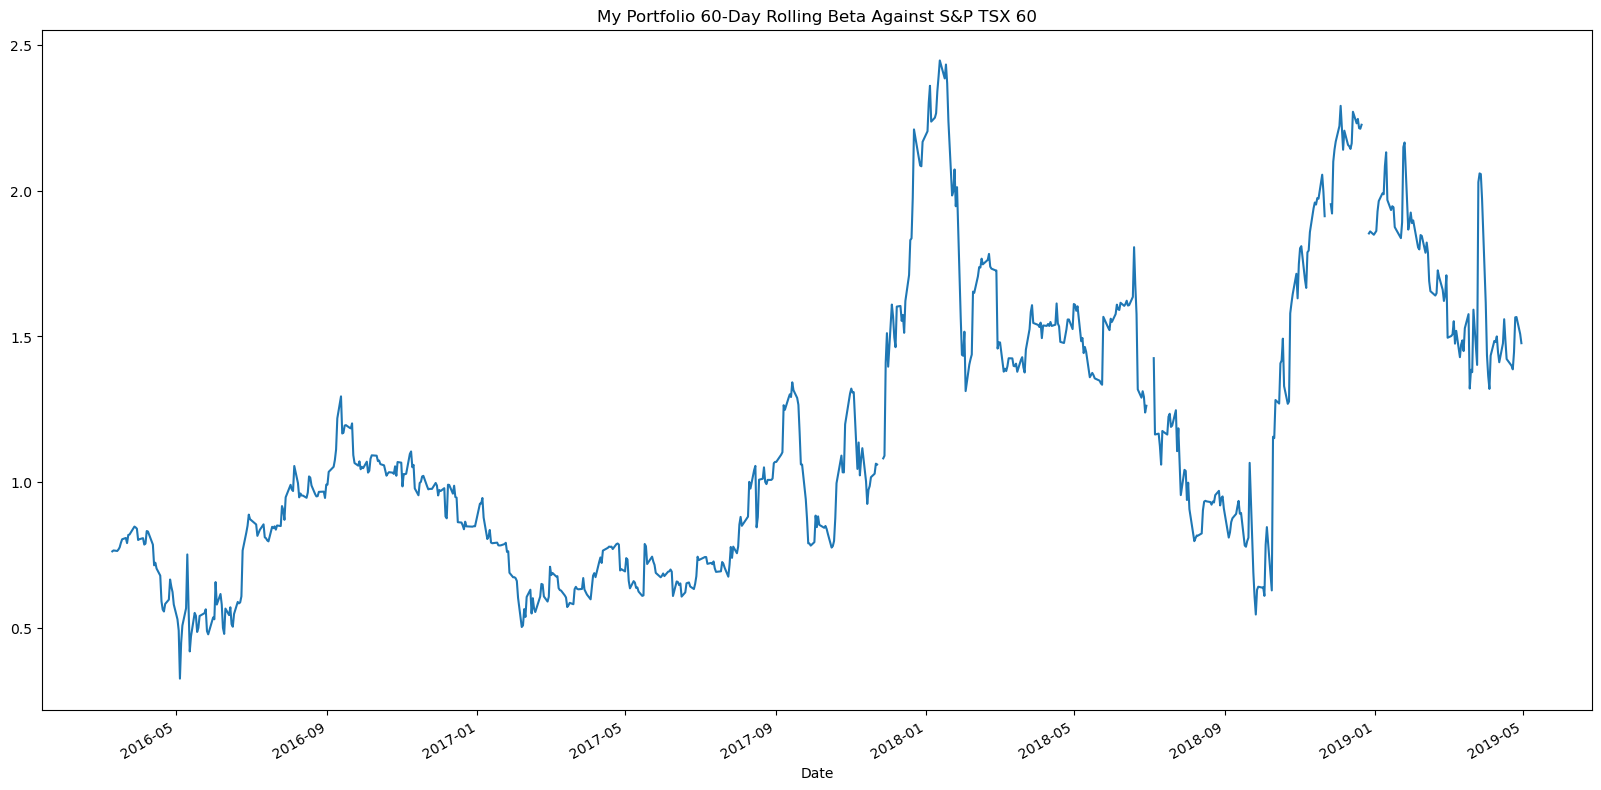

In [47]:
# Calculate and plot Beta
# my_portfolio_covariance = all_portfolios_df['My Portfolio'].cov(all_portfolios_df['S&P TSX 60 Returns'])
# my_portfolio_covariance
# # Computing beta
# my_portfolio_beta = my_portfolio_covariance / snp60_variance
# my_portfolio_beta
# # Plot beta trend
# my_portfolio_rolling_variance = all_portfolios_df['S&P TSX 60 Returns'].rolling(window=60).var()

my_portfolio_rolling_covariance = all_portfolios_df['My Portfolio'].rolling(window=60).cov(all_portfolios_df['S&P TSX 60 Returns'])
my_portfolio_rolling_beta = my_portfolio_rolling_covariance / snp60_rolling_variance
my_portfolio_rolling_beta.plot(figsize = (20,10), title = 'My Portfolio 60-Day Rolling Beta Against S&P TSX 60')

# algo2_covariance = combined_df['Algo 2'].cov(combined_df['S&P TSX 60 Returns'])
# algo2_covariance
# # Calculate variance of S&P TSX
# snp60_variance = combined_df['S&P TSX 60 Returns'].var()
# snp60_variance
# # Computing beta
# algo2_beta = algo2_covariance / snp60_variance
# algo2_beta
# # Plot beta trend
# snp60_rolling_variance = combined_df['S&P TSX 60 Returns'].rolling(window=60).var()
# algo2_rolling_covariance = combined_df['Algo 2'].rolling(window=60).cov(combined_df['S&P TSX 60 Returns'])
# algo2_rolling_beta = algo2_rolling_covariance / snp60_rolling_variance
# algo2_rolling_beta.plot(figsize = (20,10), title = 'Algo 2 60-Day Rolling Beta Against S&P TSX 60')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [48]:
# Calculate Annualized Sharpe Ratios
all_portfolios_sharpe_ratio = (all_portfolios_df.mean() * 252)/ all_portfolios_annualized_std

<Axes: title={'center': 'Sharpe Ratio of All Portfolios'}>

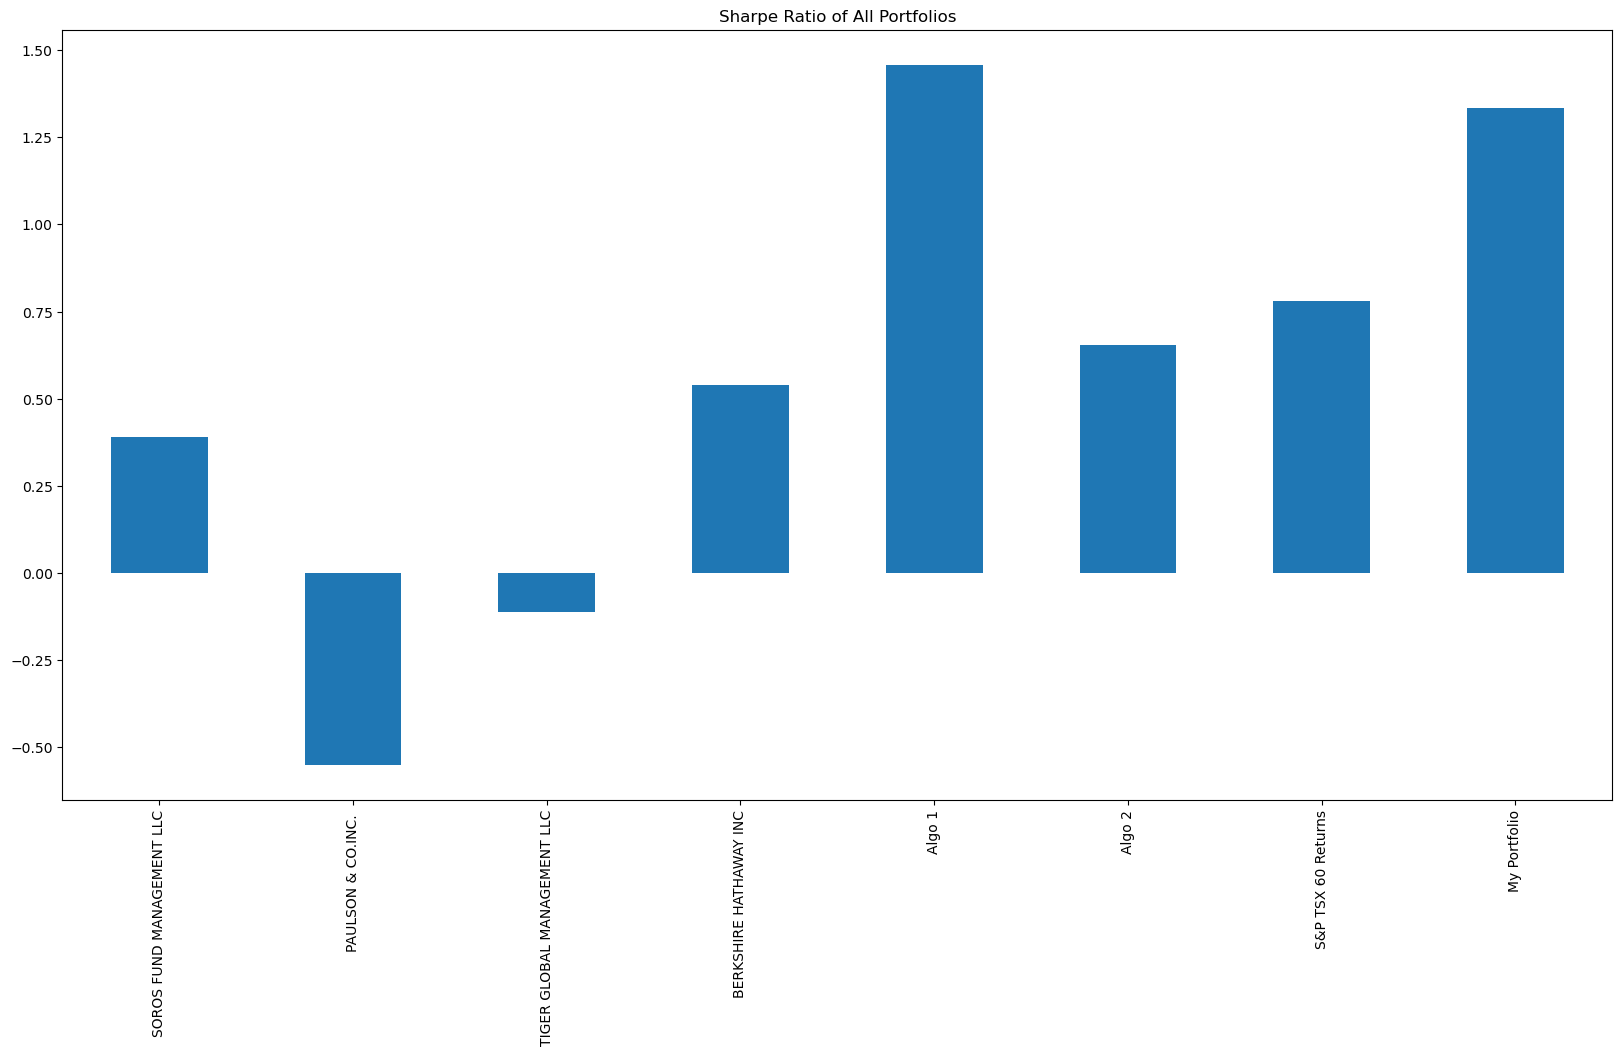

In [49]:
# Visualize the sharpe ratios as a bar plot
all_portfolios_sharpe_ratio.plot.bar(figsize = (20,10), title = 'Sharpe Ratio of All Portfolios')

### How does your portfolio do?

Write your answer here!

In [ ]:
Wow!! My Portfolio outperformed Algo 1 in sharpe ratio! It did have the highest std, however that was compensated with the high sharpe ratio and reasonable betta to S&P TSX 60. 
I would invest in My Portfolio!.